## Customer Churn Prediction - Exploratory Data Analysis (EDA)

### 🎯 Objective
The goal of this notebook is to understand the drivers of customer churn. We will:
1. Clean and prepare the data.
2. Analyze the Target Variable (`Churn Label`).
3. Investigate Numerical and Categorical features.
4. Test hypotheses (e.g., "Do Senior Citizens churn more?").
5. Summarize key insights to guide our modeling.

### 1. Imports & Setup

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Load Data

In [38]:
df = pd.read_excel("../data/raw/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### 3. Data Cleaning

### 🕵️‍♂️ Issue Found: `Total Charges`
We noticed that `Total Charges` is of type `object` (string) instead of `float`. This is likely due to blank spaces for new customers.

**Action:** Convert to numeric and fill missing values with 0.

In [40]:
# Convert 'Total Charges' to numeric, coercing errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check for null values
print(f"Missing values in Total Charges: {df['Total Charges'].isnull().sum()}")

# Fill missing values with 0 (since these are usually customers with 0 tenure)
df['Total Charges'] = df['Total Charges'].fillna(0)

Missing values in Total Charges: 11


### 4. Target Variable Analysis (`Churn Label`)
We need to check if our dataset is balanced.

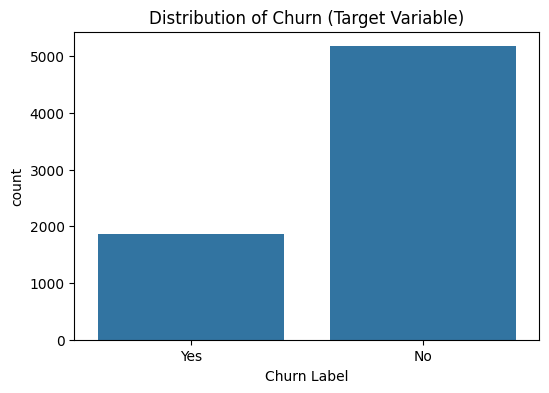

Churn Rate:
Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn Label', data=df)
plt.title('Distribution of Churn (Target Variable)')
plt.show()

churn_rate = df['Churn Label'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")

**Observation:** The dataset is imbalanced. Only ~26% of customers churn. We need to keep this in mind during modeling (Accuracy might be misleading).

### 5. Numerical Feature Analysis

### Hypothesis: "Loyal customers (High Tenure) churn less."

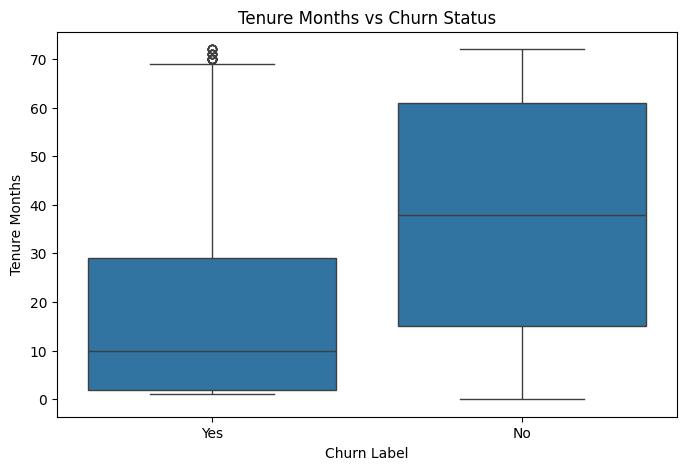

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn Label', y='Tenure Months', data=df)
plt.title('Tenure Months vs Churn Status')
plt.show()

**Insight:** Confirmed. Churners (Orange box) generally have much lower tenure. The median tenure for churners is roughly 10 months, while for non-churners it's over 30.

## 6. Categorical Feature Analysis
Let's look at `Contract`, `Internet Service`, and `Payment Method`.

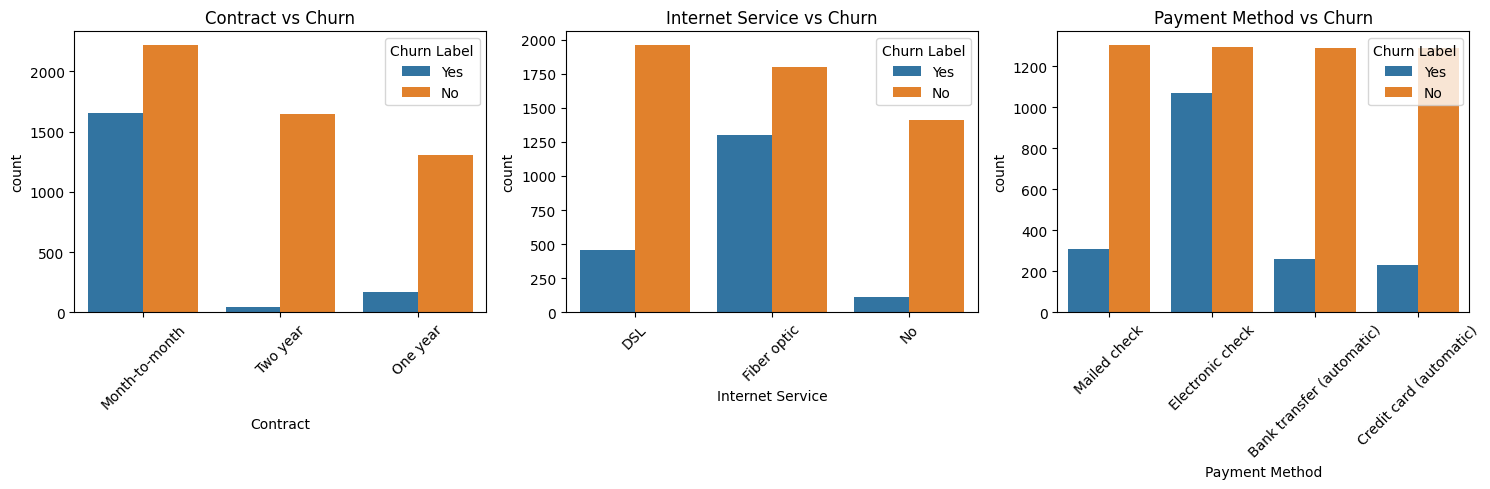

In [43]:
cat_cols = ['Contract', 'Internet Service', 'Payment Method']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Churn Label', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### 💡 Key Insights:
1.  **Contract:** `Month-to-month` customers have a HUGE churn rate. Long-term contracts rarely churn.
2.  **Internet:** `Fiber optic` customers churn significantly more than DSL or No Internet users. (Price sensitivity? Service issues?)
3.  **Payment:** `Electronic check` users are the most likely to leave.

## 7. Demographic Analysis

### Hypothesis: "Do Senior Citizens churn more?"

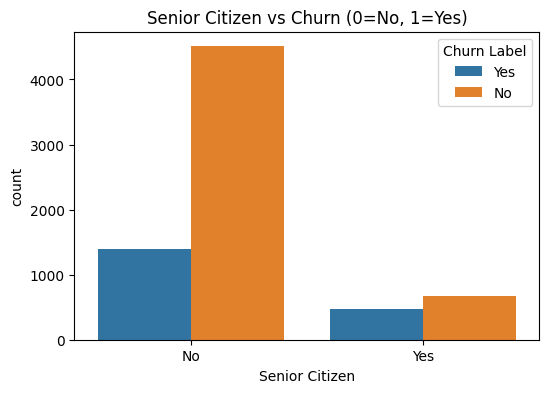

Non-Senior Churn Rate: 23.61%
Senior Citizen Churn Rate: 41.68%


In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Senior Citizen', hue='Churn Label', data=df)
plt.title('Senior Citizen vs Churn (0=No, 1=Yes)')
plt.show()

senior_churn = df.groupby('Senior Citizen')['Churn Value'].mean() * 100
print(f"Non-Senior Churn Rate: {senior_churn[0]:.2f}%")
print(f"Senior Citizen Churn Rate: {senior_churn[1]:.2f}%")

**Insight:** Yes! Senior Citizens have a **41.68%** churn rate, compared to just 23.61% for others. This is a high-risk group.

### Extended Demographics: Partner & Dependents
Hypothesis: Customers with families (Partner/Dependents) are more stable and churn less.

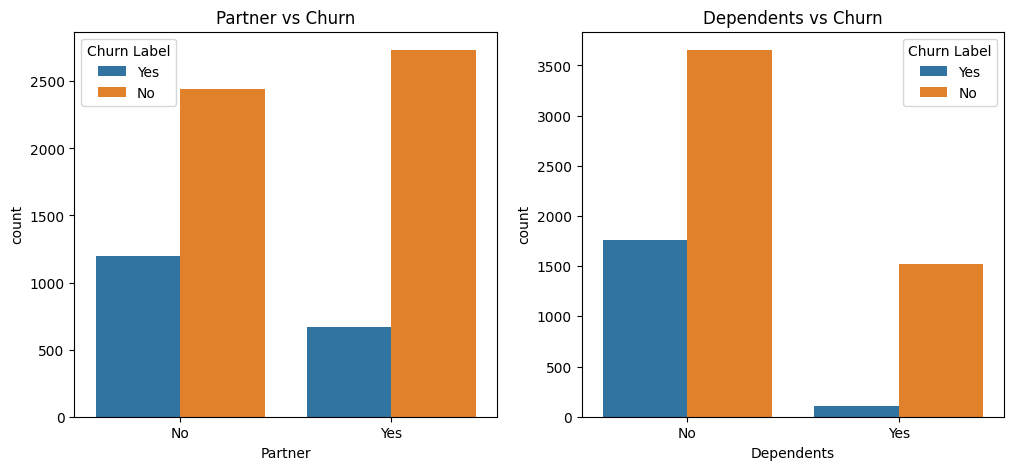

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Partner', hue='Churn Label', data=df)
plt.title('Partner vs Churn')

plt.subplot(1, 2, 2)
sns.countplot(x='Dependents', hue='Churn Label', data=df)
plt.title('Dependents vs Churn')
plt.show()

## 8. Services Analysis
Hypothesis: Value-added services (Security, Backup, Support) act as "sticky features" that reduce churn.

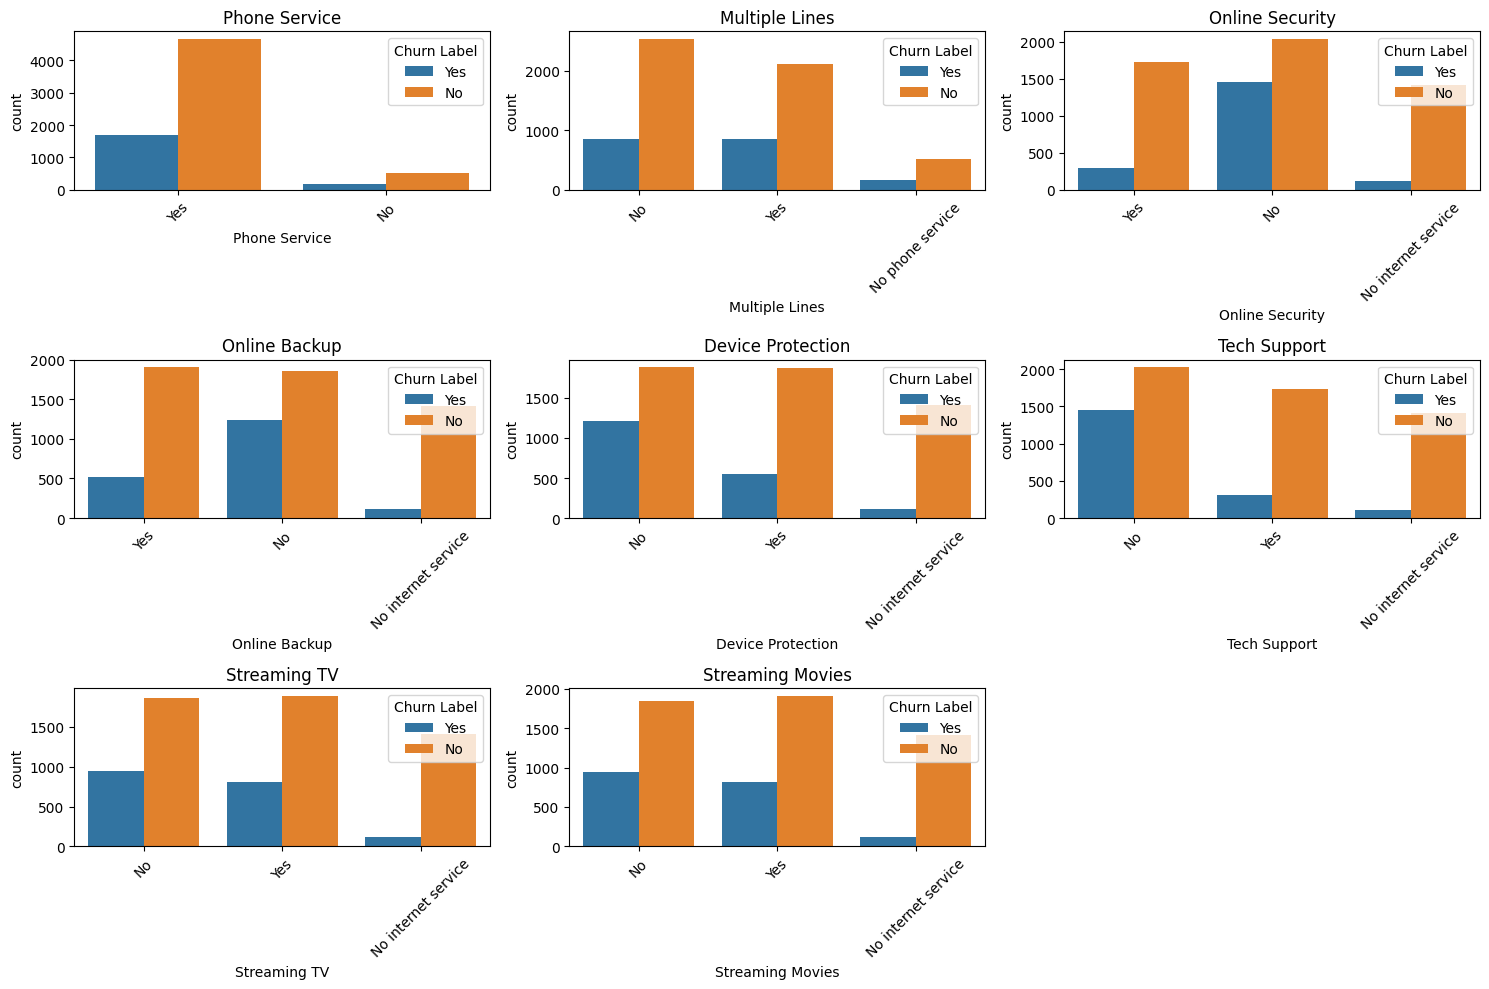

In [49]:
services = ['Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 
            'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

plt.figure(figsize=(15, 10))
for i, col in enumerate(services):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue='Churn Label', data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Geospatial Analysis
Does location matter? Let's plot customers on a map.

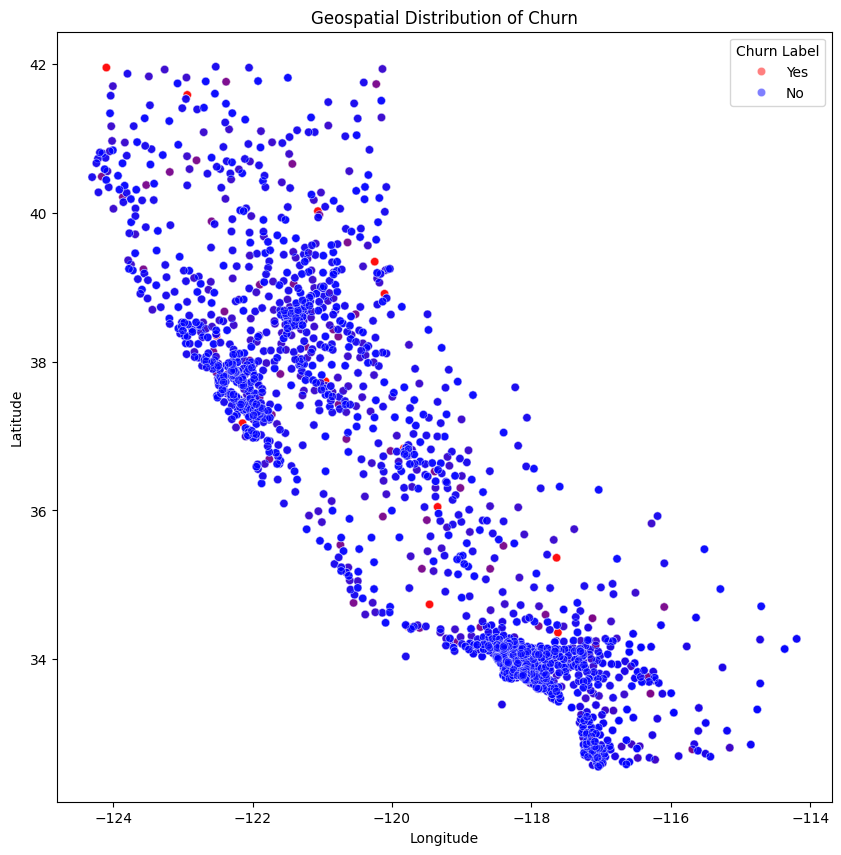

In [47]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Churn Label', data=df, alpha=0.5, palette={'Yes': 'red', 'No': 'blue'})
plt.title('Geospatial Distribution of Churn')
plt.show()

**Conclusion:** The red dots (churners) are scattered randomly. We calculated the North vs South churn rate and found a negligible difference (<1%).
**Decision:** We will **DROP** location columns (`Latitude`, `Longitude`, `Zip Code`, etc.) to reduce noise.

## 10. Correlation Analysis
Let's look at the correlation between numerical features.

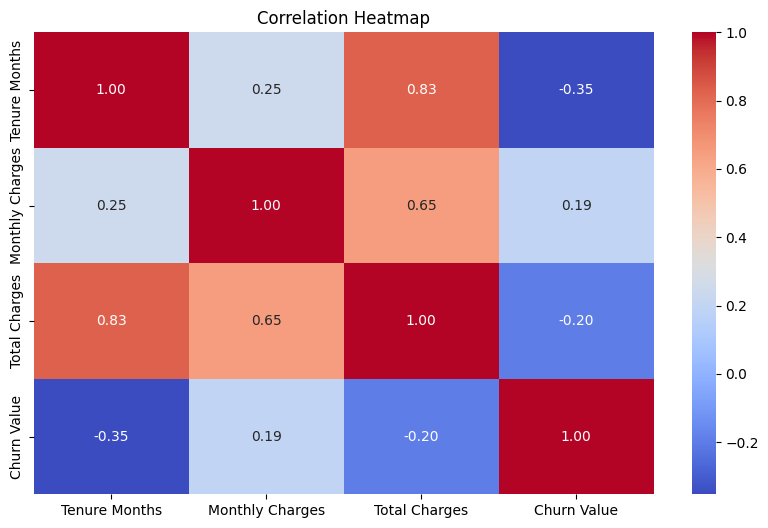

In [48]:
# Drop non-numeric and ID columns for correlation
drop_cols = ['CustomerID', 'Count', 'Country', 'State', 'City', 
             'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 
             'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason']

df_clean = df.drop(columns=[c for c in drop_cols if c in df.columns])

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 🧠 The "Total Charges" Trap
We noticed `Total Charges` has a **negative** correlation with Churn. This is counter-intuitive (paying more = staying?).

**Reason:** `Total Charges` is a proxy for Tenure. 
$$ \text{Total Charges} \approx \text{Monthly Bill} \times \text{Tenure} $$
High Total Charges usually means the customer has been with us for a long time (High Tenure), and long-term customers are loyal.

## 📝 Summary of Findings

1.  **Tenure is King:** New customers are the most likely to leave.
2.  **Contract Matters:** Month-to-month contracts are risky.
3.  **Fiber Optic Issue:** There is something wrong with our Fiber Optic service (or pricing) driving people away.
4.  **Senior Citizens:** This demographic needs special attention (42% churn).
5.  **Location:** Geography is not a significant driver.

**Next Steps:** Proceed to `2.model_training.ipynb` to build our Machine Learning models!